# Travail personnel 1 : Pendule double et Runge Kutta
## Safae Ben Ayad & Maxime Langlet
### 13 Novembre 2018


## Introduction

Dans ce travail, nous nous intéressons au problème du pendule double.
Il s'agit d'un premier pendule à l'extrémité duquel on accroche un deuxième pendule. Chacun des deux pendules est constitué lui-même d'un barreau de longueur $l$ et de masse $m$, le tout constitue donc le pendule double. 

On cherche à résoudre les équations du mouvement du pendule double, pour ce faire nous allons tout d'abord décrire ce système grâce au formalisme lagrangien et résoudre celui-ci à l'aide de la méthode numérique RK4 ( Runge-Kutta d'ordre 4). Ensuite, nous discuterons de l'ordre de convergence de cette méthode, et pour finir, nous allons illustrer le système considéré à l'aide d'une animation.

## Formalisme Lagrangien

Nous allons prendre nos axes de la manière suivante; $y$ est l'axe horizontal avec les coordonnées positives à droite de l'origine et $x$ l'axe vertical avec les coordonées positives vers le haut. Les angles $\theta_1$ et $\theta_2$ sont les angles du premier et deuxième pendule respectivement. Ceux-ci sont les angles par rapport à l'axe vertical dans le sens trigonométrique.

Par définition du Langrangien, $L$ vaut: $$L = K - V $$ 

où $K = \frac{1}{2}(m v_1^2 + mv_2^2) + \frac{1}{2}I(\dot\theta_1+\dot\theta_2)$ l'énergie cinétique du pendule
et $V = mg(y_1 + y_2)$ l'énergie potentiel du pendule. 


En coordonnées polaires, nos paramètres sont: 

\begin{align*}
x_1 &=\frac{l}{2}sin(\theta_1) \\
y_1 &=-\frac{l}{2}cos(\theta_1) \\
x_2 &=l(sin(\theta_1)+\frac{1}{2}sin(\theta_2)) \\
y_2 &=-l(cos(\theta_1)+\frac{1}{2}cos(\theta_2)) \\
\end{align*}

Pour écrire le Langrangien en coordonnées polaire, on calcule les dérivées: $\dot x_1$, $\dot x_2$, $\dot y_1$ et $\dot y_2$ à fin d'écrire la vitesse en coordonnées polaires sachant que la norme de la vitesse 1 et la vitesse 2 est:

\begin{align*}
v_1^2 &= \dot x_1^2 + \dot y_1^2 \\
v_2^2 &= \dot x_2^2 + \dot y_2^2 \\ 
\end{align*}

Ecrivons les dérivées:

\begin{align*}
 \dot x_1 &= \frac{l}{2} cos(\theta_1) \dot\theta_1 \\
 \dot y_1 &= \frac{l}{2} sin(\theta_1) \dot\theta_1 \\
 \dot x_2 &= lcos(\theta_1) \dot\theta_1 + \frac{l}{2} cos(\theta_2) \dot\theta_2 \\ 
 \dot y_2 &= lsin(\theta_1) \dot\theta_1 + \frac{l}{2} sin(\theta_2) \dot\theta_2  \\
\end{align*}

Donc en remplaçant dans les expressions de $v_1^2$ et $v_2^2$:


\begin{align*}
 v_1^2 &= (\frac{l}{2}cos(\theta_1)\dot\theta_1)^2 + (\frac{l}{2}sin(\theta_1)\dot\theta_1)^2 
 = \frac{l^2}{4}\dot\theta_1^2 \\
 v_2^2 &= l^2 ( cos(\theta_1)^2 \dot\theta_1^2 + \frac{1}{4}cos(\theta_2)^2\dot\theta_2^2+ cos (\theta_1) cos(\theta_2)\dot\theta_1 \dot\theta_2 + sin(\theta_1)^2 \dot\theta_1^2 + \frac{1}{4} sin(\theta_2)^2 \dot\theta_2^2 + sin(\theta_1) sin(\theta_2)\dot\theta_1 \dot\theta_2) \\
 &=  l^2 (\dot\theta_1^2 + \frac{1}{4}\dot\theta_2^2 + \dot\theta_1 \dot\theta_2 ( cos (\theta_1) cos(\theta_2) + sin(\theta_1) sin(\theta_2)))\\
 &= l^2 (\dot\theta_1^2 + \frac{1}{4}\dot\theta_2^2 + \dot\theta_1 \dot\theta_2 cos (\theta_1 -\theta_2) )
\end{align*}

Remplaçons dans l'expression de l'énergie cinétique ainsi que dans celle de l'energie potentiel:

\begin{align*}
 V &=  mg(y_1 + y_2) = -mgl(\frac{3}{2} cos(\theta_1) +  \frac{1}{2} cos(\theta_2) \\
 &=  -\frac{mgl}{2}(3cos(\theta_1) +  cos(\theta_2) \\
 K &= \frac{1}{2}(m v_1^2 + mv_2^2) + \frac{1}{2}I(\dot\theta_1+\dot\theta_2) \\
 &= \frac{1}{2}m l^2 (\frac{1}{4}\dot\theta_1^2 + \dot\theta_1^2 + \frac{1}{4}\dot\theta_2^2 + \dot\theta_1 \dot\theta_2 cos (\theta_1 -\theta_2) + \dot\theta_1+\dot\theta_2) \\
 &= \frac{ml^2}{6}\big(\dot\theta_2^2+4\dot\theta_1^2+3\dot\theta_1\dot\theta_2cos(\theta_1-\theta_2)\big)
\end{align*}


Ceci nous donne une expression pour le Lagragien en coordonnées polaires :

$$L=\frac{ml^2}{6}\big(\dot\theta_2^2+4\dot\theta_1^2+3\dot\theta_1\dot\theta_2cos(\theta_1-\theta_2)\big)+\frac{mgl}{2}\big(3cos(\theta_1)+cos(\theta_2)\big)$$

Les équations d'Euler-Lagrange sont données par $$\frac{\partial L}{\partial \theta_{1/2}}-\frac{d}{dt}\big(\frac{\partial L}{\partial \theta_{1/2}}\big)=0$$

($\theta_{1/2}$ dénnote simplement l'équation différentielle par rapport à $\theta_1$ ou $\theta_2$)

À partit des équations d'Euler-Lagrange nous pouvons déduire les équations du mouvement, on trouve alors pour les quantités de mouvements :

$$p_{\theta_1}=\frac{\partial L}{\partial \dot\theta_1}=\frac{ml^2}{6}\big(8\dot\theta_1+3\dot\theta_2 cos(\theta_1-\theta_2)\big)$$

$$p_{\theta_2}=\frac{\partial L}{\partial \dot\theta_2}=\frac{ml^2}{6}\big(2\dot\theta_2+3\dot\theta_1 cos(\theta_1-\theta_2)\big)$$

En isolant les vitesses angulaires, nous trouvons :

$$\dot\theta_1=\frac{6}{ml^2}\frac{2 p_{\theta_1}-3cos(\theta_1-\theta_2)p_{\theta_2}}{16-9cos^2(\theta_1-\theta_2)}$$

$$\dot\theta_2=\frac{6}{ml^2}\frac{8 p_{\theta_2}-3cos(\theta_1-\theta_2)p_{\theta_1}}{16-9cos^2(\theta_1-\theta_2)}$$

Le restant des équations du mouvement sont : 

$$\dot{p_{\theta_1}}= -\frac{ml^2}{2}\big(\dot\theta_1\dot\theta_2sin(\theta_1-\theta_2)+3\frac{g}{l}sin(\theta_1)\big)$$

$$\dot{p_{\theta_2}}= -\frac{ml^2}{2}\big(-\dot\theta_1\dot\theta_2sin(\theta_1-\theta_2)+\frac{g}{l}sin(\theta_2)\big)$$

# La méthode Runge-Kunta
## Introduction à la méthode

Soit une équation différentielle du premier ordre avec ses conditions initiales,

$$\dot y = f(t,y)$$
$$y(t_0)=y_0$$

où $y$ est une fonction vectorielle inconnue, dépendant du temps, que nous aimerions approximer. La fonction $f$ et les valeurs initiales nous sont données.

Dans notre système du double pendule, nous aurons comme conditions initiales les valeurs suivantes : 
$$\theta_1=\theta_2=\frac{\pi}{2} , \\
p_{\theta_1}=p_{\theta_2}=0 $$
(car $\dot\theta_1=\dot\theta_2=0$)

Dans notre système, la fonction $y$ est donnée par l'expression suivante : 
$$ y= 
\begin{pmatrix} 
\theta_1 \\
\theta_2 \\
p_{\theta_1} \\
p_{\theta_2} \\
\end{pmatrix}$$

Comme nous avons les expressions des dérivées de chacun de ces termes, a fonction f est alors :
$$f=
\begin{pmatrix}
\frac{6}{ml^2}\frac{2 p_{\theta_1}-3cos(\theta_1-\theta_2)p_{\theta_2}}{16-9cos^2(\theta_1-\theta_2)} \\
\frac{6}{ml^2}\frac{8 p_{\theta_2}-3cos(\theta_1-\theta_2)p_{\theta_1}}{16-9cos^2(\theta_1-\theta_2)} \\
-\frac{ml^2}{2}\big(\dot\theta_1\dot\theta_2sin(\theta_1-\theta_2)+3\frac{g}{l}sin(\theta_1)\big) \\
-\frac{ml^2}{2}\big(-\dot\theta_1\dot\theta_2sin(\theta_1-\theta_2)+\frac{g}{l}sin(\theta_2)\big) \\
\end{pmatrix}
$$

Mais nous pouvons constater que $f$ ne dépend pas de $t$ explicitement.


La méthode RK4 nous donnera une suite de $t_n$, dépendant d'un time step $dt$ : 
$$t_n=t_{n-1}+dt$$

Pour chaque $t_n$, une valeur $y_n$ sera associée en itérant l'opération suivante :
$$y_n=y_{n-1}+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$$

où, 
\begin{align*}
k_1 &=dt.f(y_{n-1}) \\
k_2 &=dt.f(y_{n-1} + \frac{k_1}{2}) \\
k_3 &=dt.f(y_{n-1} + \frac{k_2}{2}) \\
k_4 &=dt.f(y_{n-1}+k_3) \\
\end{align*}

Nous avons adapté la méthode RK4 à notre système, ici $f$ ne dépend pas de $t$. Originellement, la fonction $f$ peut dépendre de $t$, ceci apportera certaines modifications à l'algorithmie de la méthode. 

La méthode RK4 estime la valeur de $y(t_{n})$, et la valeur $y_{n}$ est déterminée en fonction de $y_{n-1}$ plus la moyenne pondérée des 4 incréments $k_i$. 

## Application de la méthode

Commençons par importer les bibliothèque de language.

In [1]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

Dans la cellule suivante, nous définissons les valeurs initiales, ainsi que notre fonction $f$ de notre équation différentielle. Nous travaillons avec des tableaux *numpy* car ceux-ci nous permettent d'effectuer des opérations entre tableaux, ce qui sera essentiel pour la suite lorsque nous appliquerons RK4 sur nos listes.

On remarque bien encore une fois que $f$ ne dépend pas du temps. Par la même occasion, dans la définition de la fonction $f$, nous donnons les variables à $u$.

In [2]:
#Données/Conditions initiales
l=1             #longueur
m=1             #masse
g=9.81
a10=math.pi/2   #theta1 val initiale
a20=math.pi/2   #theta2 val initiale
pa10=0          #impulsion1 val initiale
pa20=0          #impulsion2 val initiale
t0=0
T = 20.0                                # length of the time interval
dt = 0.001                              # time-step size
N = int(T / dt) + 1                     # number of time steps
u0 = np.array([a10,a20,pa10,pa20])


#On def f comme la fonction f(u)=u'
#u etant la liste nos variables
#u' la liste des derivées (stockées dans results) 

def f(u):
    a1=u[0]
    a2=u[1]
    pa1=u[2]
    pa2=u[3]   
    b1=6/(m*l**2)*(2*pa1-3*np.cos(a1-a2)*pa2)/(16-9*np.cos(a1-a2)**2)   #derivée de théta1
    b2=6/(m*l**2)*(8*pa2-3*np.cos(a1-a2)*pa1)/(16-9*np.cos(a1-a2)**2)   #derivée de théta2
    qa1 = -1/2*m*l**2*(b1*b2*np.sin(a1-a2)+3*g/l*np.sin(a1))            #dérivée de l'imp 1
    qa2 = -1/2*m*l**2*(-b1*b2*np.sin(a1-a2)+g/l*np.sin(a2))             #dérivée de l'imp 2
    result = np.array([b1,b2,qa1,qa2])                                  #liste des derivées de nos variables
    return result

Ensuite, nous implémentons RK4 de la manière suivante, en itérant N fois l'algorithme. Nous préférons créer des tableaux de zéros plutôt que d'utiliser "append" pour des raisons d'optimisation d'espace.

In [3]:
def RK4(f,u0,dt,T,t0):
    N = int(T / dt) + 1 
    
    tv = np.zeros(N)        # liste de 0's pour stocker les valeurs des dt (intervalles de temps)
    uv = np.zeros((N,4))    # matrice Nx4 de 0's pour stocker les solutions 
                            # en chaque ligne les differentes 4 variable pour un time-step 
                            # 4 variables (une par colonne) theta1, theta2, impul1, impul2
            
    tv[0]=t0              
    uv[0]=u0
    for i in range(1,N):
        k1=dt*f(uv[i-1])
        k2=dt*f(uv[i-1]+k1/2)
        k3=dt*f(uv[i-1]+k2/2)
        k4=dt*f(uv[i-1]+k3)
        
        #on crée liste us de 4éléments avec les valeurs de uv qui changent pour chaque dt (par R-K)
        us = uv[i-1] + 1/6*(k1+2*k2+2*k3+k4) 
        
        tv[i] = tv[i-1]+dt      #on stocke dans tv
        uv[i] = us              #on rempli uv avec la liste us
    return(tv,uv)

Une fois après avoir stocké toutes les valeurs approximées des positions pour $\theta_1$, $\theta_2$ et $t$, il nous suffit de transformer les coordonnées polaires en coordonnées cartésiennes, donnés par les changements de variables suivants :
\begin{align*}
x_1&=l.sin(\theta_1)\\
y_1&=-l.cos(\theta_2)\\
x_2&=l.\big(sin(\theta_1)+sin(\theta_2)\big)\\
y_2&=-l.\big(cos(\theta_1)+cos(\theta_2)\big)\\
\end{align*}

Encore une fois, nous utilisons des tableaux de zéros et nous remplaçons les valeurs des positions dans la boucle *for*.
Nous pouvons désormais donner une valeur sur la position des extrémités des bras après $20 s$, pour cela nous demandons un "print" à la fin de la cellule ci-dessous sur la dernière position de chaque nouveau tableau $x_1,y_1,x_2,y_2$ ( qui correspondent à la position au cours du temps ), c-à-d. les N-ième éléments de chaque tableau.

In [4]:
"Convertions en coordonées cartésiennes"
solutions = RK4(f,u0,0.001,20,0)
#tvs = solutions[0]             
uvs = solutions[1]

x1 = np.zeros(N)      #nouvelles listes de 0's taille N
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)

for i in range(N):
    x1[i] = l*np.sin(uvs[i][0])
    y1[i] = -l*np.cos(uvs[i][0])
    x2[i] = l*(np.sin(uvs[i][0]) + np.sin( uvs[i][1] ))
    y2[i] = -l*(np.cos( uvs[i][0] ) + np.cos( uvs[i][1] ))
print( "Position de l'extrémité du premier bras : (x1,y1) = (",x1[N-1],",", y1[N-1],")")
print( "Position de l'extrémité du deuxième bras : (x2,y2) = (",x2[N-1],",", y2[N-1],")")

Position de l'extrémité du premier bras : (x1,y1) = ( 0.6626895606587564 , -0.748894215623211 )
Position de l'extrémité du deuxième bras : (x2,y2) = ( 0.06008961250572198 , 0.04914920580569859 )


## Ordre de Convergence
Maintenant, nous allons discuter de l'ordre de convergence de notre méthode RK4. 

La fonction $L1_{norme}$ nous donne la norme de la différence entre 2 tableaux dont valeurs sont données à des time-steps $dt$ différents. On remarque que pour ces tableaux, comme les time-steps sont différents pour l'un et l'autre, le nombre d'éléments qui les constituent ne sont pas équivalents. Le code ci-dessous nous permet d'effectuer quand même des opérations car, par exemple; pour 2 tableaux de 10 et de 100 time-steps respectivement, il associe un élément du premier tableaux (n=10) 10 éléments du deuxième tableau (n=100).

Le calcul du ratio nous donnera combien d'éléments de notre tableau u_raffine seront associés à un élément de notre tabeau u_courant.

In [5]:
def l1_norme(u_courant, u_raffine, dt):
    N_courant = u_courant.shape[0]
    N_raffine = u_raffine.shape[0]
    ratio = math.ceil(N_raffine / N_courant)
    diff = dt * np.sum(np.abs(u_courant - u_raffine[::ratio]))
    return diff

Regardons maintenant pour des valeurs de dt que nous stockons dans dt_values. 
La première boucle *for* permet de stocker, dans une liste u_values, les positions, via la méthode de Runge-Kutta 4, pour différents time-steps. La deuxième emmagasine les valeurs de la norme de la différence entre 2 éléments de u_values. 

Une fois ces boucles terminées, nous plottons diff_values sur un graphique en fonction des time-steps. Nous pourrons alors observer le caractère convergent ou non de notre méthode. 

A cause des nombreux time-steps différents et qui deviennent de plus en plus petits, la cellule suivante prends quelques secondes avant d'afficher le graphique attendu.

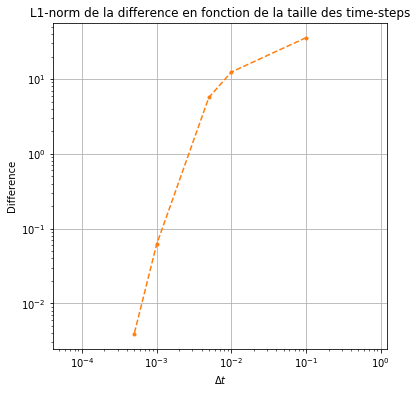

In [6]:
dt_values = [0.1,0.01,0.005,0.001,0.0005,0.00025]
u_values = [] 
diff_values = []

for dt in dt_values:
    sol = RK4(f,u0,dt,T,t0)[1]
    u_values.append(sol) 

for y, dt in zip(u_values, dt_values):
    diff = l1_norme(y[:, 2], u_values[-1][:, 2], dt)   
    diff_values.append(diff)

# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm de la difference en fonction de la taille des time-steps')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values[:-1],
              color='C1', linestyle='--', marker='.')
pyplot.axis('equal');

Nous remarquons une convergence se former lorsque les time-steps deviennent petits, nous devrons alors faire un choix judicieux pour les time-steps si l'on veut calculer explicitement la valeur de l'ordre de convergence. En vue du graphique, nous avons envie d'utiliser la différence entre les derniers time-steps de notre liste $dt_{values}$, c-à-d. les 2 derniers éléments du tableau $diff_{values}$. Ce sont ces 2 derniers éléments qui nous donnerons la meilleure approximation de l'ordre de convergence.

De ce fait, nous avons les relations suivantes nous permettant d'avoir une valeur numérique sur l'ordre: 

$$p=\frac{log\big(\frac{f_3-f_2}{f_2-f_1}\big)}{log(r)}$$

où $p$ est l'ordre de convergence, $r$ est le coéficient de proportionnalité entre 2 time-steps et les $f_i-f_{i-1}$ sont en réalité les 2 derniers éléments de notre tableau $diff_{values}$.

Nous pouvons alors implémenter ça et nous trouvons :

In [7]:
"Ordre de convergence"
r=2
f3_f2=diff_values[3]
f2_f1=diff_values[4]
# calcul de l'ordre de convergence
p = math.log(f3_f2 / f2_f1) / math.log(r)

print('L ordre de convergence est p = {:.3f}'.format(p));

L ordre de convergence est p = 3.986


Nous remarquons que l'ordre de convergence est 4 avec une bonne approximation.

Etudions maintenant le cas où nous prenons des time-steps inappropriés. Prenons comme time-step initial $0.001$ et ensuite doublons 2 fois celui-ci et regardons l'ordre de convergence.

In [8]:
"Ordre de convergence"

s = 2  # time-step size refinement ratio
h=0.001


dt_values2 = [h,h*s,h*s**2]
u_values2 =[]

for ds in dt_values2:
    sol2 = RK4(f,u0,ds,T,t0)[1]
    u_values2.append(sol2)

#calcul de g2 - g1
g2_g1= l1_norme(u_values2[1], u_values2[0], dt_values2[1])

#calcul de g3 - g2
g3_g2 = l1_norme(u_values2[2], u_values2[1], dt_values2[2])
G = math.log(g3_g2 / g2_g1) / math.log(s)

print('L ordre de convergence est p = {:.3f}'.format(G));

L ordre de convergence est p = 3.024


Ce résultat confirme bien que le choix des time-steps est important, comme nous le voyons sur le graphique proposé plus haut, il faut utiliser une précision assez importante pour pouvoir utiliser RK4 avec un ordre de convergence 4. De ce fait, il serait plus approprié de montrer un graphique n'affichant que les deux derniers points du tableau $diff_{values}$.

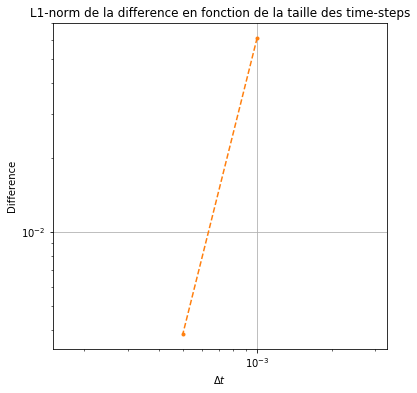

In [10]:
dt_valuesfinal= [0.001,0.0005,0.00025]
u_valuesfinal= []
diff_valuesfinal = []

for dt in dt_valuesfinal :
    sol = RK4(f,u0,dt,T,t0)[1]
    u_valuesfinal.append(sol)
    
for y, dt in zip(u_valuesfinal, dt_valuesfinal):
    diff = l1_norme(y[:, 2], u_values[-1][:, 2], dt)
    diff_valuesfinal.append(diff)
    
    
# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm de la difference en fonction de la taille des time-steps')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_valuesfinal[:-1], diff_valuesfinal[:-1],
              color='C1', linestyle='--', marker='.')
pyplot.axis('equal');

## Animation

La section suivante concerne l'animation du double pendule. Les positions au cours du temps sont déjà enregistrées dans nos tableaux, il reste simplement à programmer l'animation.

La cellule ci-dessous nous permet de paramétrer une image de notre animation, et de créer la figure dans laquelle le pendule sera représenté.

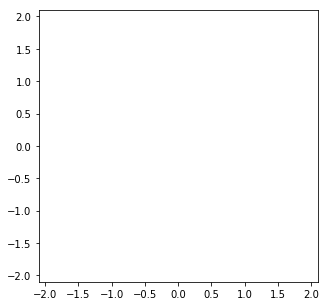

In [11]:
dt=0.001                                                 #remise de dt a sa valeur initiale
fig = pyplot.figure(figsize=(5.0, 5.0))                  #taille de la figure
ax = fig.add_subplot(111,autoscale_on=False)
pyplot.xlim(-2.1, 2.1)                                   #échelle de nos axes
pyplot.ylim(-2.1, 2.1)
points2 = pyplot.plot(x2[0],y2[0],lw=0.5,color='C1')[0]  #parametrisation de notre trace
line, = pyplot.plot([], [], '.-', lw=1.5,color='C3')     #parametrisation de nos pendules

time_template = 'time = %.1fs'
time_text = pyplot.text(0.1, 0.8, '', transform=ax.transAxes)

In [13]:
# fonctionnalité initialisation et d'animation

def init(): #definit l'arrière plan
    line.set_data([], [])
    time_text.set_text('')
    points2.set_data([],[])
    return line, points2 ,time_text


def animate(i): #définit l'animation
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    points2.set_xdata(x2[0:i])
    points2.set_ydata(y2[0:i])
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, points2 ,time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1,len(x1),30),
                              interval=30, blit=True, init_func=init, repeat=False)
#permet de visualiser l'animation à l'aide d'une vidéo
pyplot.show()
HTML(ani.to_html5_video())

## Conclusion


In [15]:
#faire conclu

## Référence bibliographique


• Double pendule: https://en.wikipedia.org/wiki/Double_pendulum 

• Méthode numérique RK4: https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge.E2.80.93Kutta_method 

• Numérical MOOC: https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about 

• Matplotlib Animation Tutorial: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ 

• MAtplotlib Animation: https://matplotlib.org/examples/animation/double_pendulum_animated.html 
